In [2]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import os
import matplotlib.pyplot as plt

data_path='data'

## Madrid data aggregatted

In [3]:
madrid_df= pd.read_csv(os.path.join('data','MADRID_DATA_V2.csv'))

In [4]:
madrid_df['timestamp']= madrid_df.apply(lambda r: r['Fecha'] + ' ' + r['Hora'], axis=1)
madrid_df['timestamp']= pd.to_datetime(madrid_df['timestamp'], dayfirst=True)
madrid_df= madrid_df.set_index('timestamp')
madrid_df= madrid_df.drop(columns='Fecha Hora'.split())
madrid_df.head()

,CO,O3,PM10,"PM2,5",SO2,SpeedWind,DirecWind,Temp,Humid,Precip,Car,Motorcycle,Bus,Truck
timestamp,,,,,,,,,,,,,,
2023-09-13 11:00:00,0.300,61.272727,10.727273,6.285714,1.25,1.51,20,21.2,66,0.0,1068,52,142,210
2023-09-13 12:00:00,0.275,72.272727,11.363636,6.571429,1.25,1.54,49,22.5,61,0.0,1290,15,185,184
2023-09-13 13:00:00,0.275,81.818182,11.181818,7.000000,1.25,1.46,54,23.9,55,0.0,1131,48,140,143
2023-09-13 14:00:00,0.275,95.166667,8.181818,5.285714,1.00,1.11,30,25.7,49,0.0,1251,70,182,122
2023-09-13 15:00:00,0.250,104.769231,6.000000,3.285714,1.00,0.94,51,26.7,43,0.0,1214,46,161,107


In [5]:
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421 entries, 2023-09-13 11:00:00 to 2023-09-30 23:00:00
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO          421 non-null    float64
 1   O3          421 non-null    float64
 2   PM10        421 non-null    float64
 3   PM2,5       421 non-null    float64
 4   SO2         421 non-null    float64
 5   SpeedWind   421 non-null    float64
 6   DirecWind   421 non-null    int64  
 7   Temp        421 non-null    float64
 8   Humid       421 non-null    int64  
 9   Precip      421 non-null    float64
 10  Car         421 non-null    int64  
 11  Motorcycle  421 non-null    int64  
 12  Bus         421 non-null    int64  
 13  Truck       421 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 49.3 KB


In [6]:
madrid_df.describe()

,CO,O3,PM10,"PM2,5",SO2,SpeedWind,DirecWind,Temp,Humid,Precip,Car,Motorcycle,Bus,Truck
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,0.336302,55.379525,15.873394,8.284244,1.172209,0.813207,90.403800,19.349406,65.795724,0.045368,881.665083,39.961995,114.686461,91.757720
std,0.139827,29.259099,7.918176,3.968794,0.301181,0.497661,89.658736,4.726343,16.448508,0.493574,429.569773,29.899649,67.948310,75.008242
min,0.175000,4.307692,3.833333,1.666667,1.000000,0.350000,0.000000,9.600000,32.000000,0.000000,177.000000,0.000000,16.000000,9.000000
25%,0.250000,32.333333,9.583333,5.285714,1.000000,0.420000,13.000000,15.800000,52.000000,0.000000,522.000000,17.000000,56.000000,31.000000
50%,0.300000,52.153846,13.727273,7.428571,1.000000,0.680000,50.000000,18.400000,67.000000,0.000000,843.000000,35.000000,98.000000,66.000000
75%,0.366667,76.333333,20.384615,10.428571,1.250000,1.030000,171.000000,22.600000,79.000000,0.000000,1224.000000,54.000000,169.000000,134.000000
max,1.150000,133.000000,40.769231,22.500000,3.000000,2.680000,337.000000,30.900000,99.000000,8.550000,2426.000000,174.000000,348.000000,350.000000


In [7]:
madrid_df.corr()

,CO,O3,PM10,"PM2,5",SO2,SpeedWind,DirecWind,Temp,Humid,Precip,Car,Motorcycle,Bus,Truck
CO,1.000000,-0.500457,0.600328,0.570307,0.325951,-0.378545,-0.031790,-0.003006,-0.095528,-0.074677,0.079084,0.004825,-0.061512,-0.117039
O3,-0.500457,1.000000,-0.181750,-0.215614,-0.271701,0.462449,0.174563,0.745643,-0.647033,0.045415,0.348905,0.248111,0.254881,0.092911
PM10,0.600328,-0.181750,1.000000,0.932306,0.239742,-0.261554,-0.239900,0.341515,-0.245240,-0.015436,0.232902,0.112663,0.059721,0.058571
"PM2,5",0.570307,-0.215614,0.932306,1.000000,0.164666,-0.275056,-0.284605,0.258180,-0.156555,0.029657,0.104833,0.001338,-0.065108,-0.074194
SO2,0.325951,-0.271701,0.239742,0.164666,1.000000,-0.175252,-0.132047,-0.097860,0.041842,-0.042872,0.111184,-0.043558,0.100442,0.177244
SpeedWind,-0.378545,0.462449,-0.261554,-0.275056,-0.175252,1.000000,0.516446,0.126652,-0.105765,0.120086,0.241682,0.197569,0.373210,0.310993
DirecWind,-0.031790,0.174563,-0.239900,-0.284605,-0.132047,0.516446,1.000000,-0.025638,-0.029713,0.017776,0.048396,0.066943,0.126093,-0.034287
Temp,-0.003006,0.745643,0.341515,0.258180,-0.097860,0.126652,-0.025638,1.000000,-0.804471,-0.042289,0.498357,0.379511,0.278117,0.131231
Humid,-0.095528,-0.647033,-0.245240,-0.156555,0.041842,-0.105765,-0.029713,-0.804471,1.000000,0.130522,-0.459741,-0.322589,-0.266286,-0.015548
Precip,-0.074677,0.045415,-0.015436,0.029657,-0.042872,0.120086,0.017776,-0.042289,0.130522,1.000000,-0.104804,-0.090764,-0.086311,-0.054547


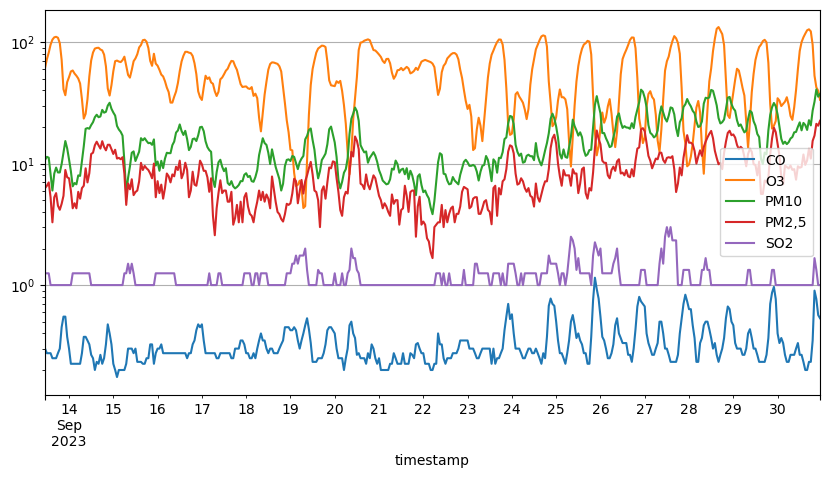

In [8]:
madrid_df['CO O3 PM10 PM2,5 SO2'.split()].plot(figsize=(10,5), grid=True, logy=True);

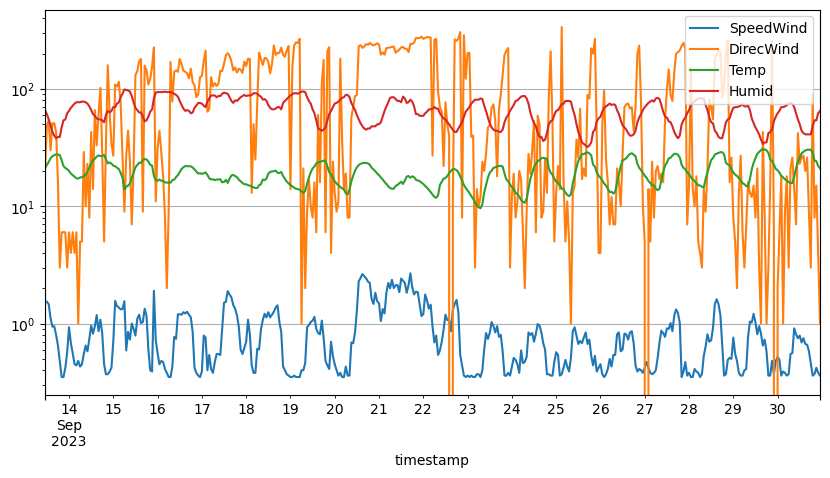

In [9]:
madrid_df['SpeedWind DirecWind Temp Humid'.split()].plot(figsize=(10,5), grid=True, logy=True);

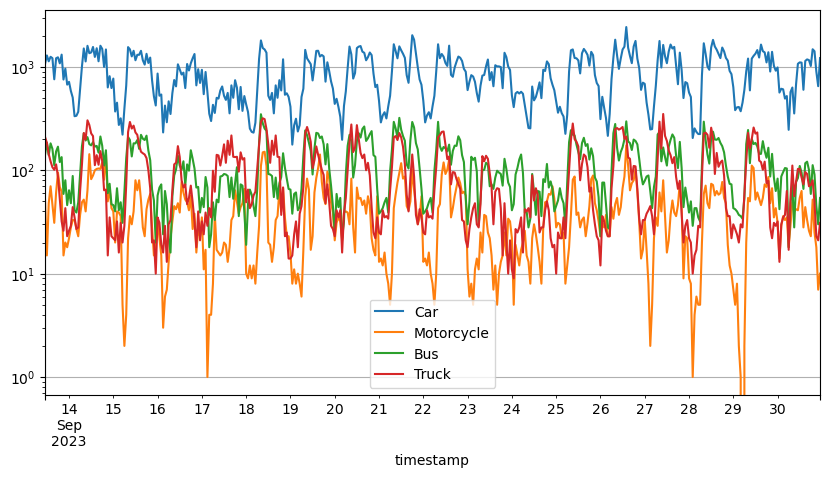

In [10]:
madrid_df['Car Motorcycle Bus Truck'.split()].plot(figsize=(10,5), grid=True, logy=True);

-------------------------------

## Bilbao aggregated data

In [11]:
bilbao_df= pd.read_csv(os.path.join('data','BILBAO_DATA.csv'))
bilbao_df['timestamp']= bilbao_df.apply(lambda r: r['Fecha'] + ' ' + r['Hora'], axis=1)
bilbao_df['timestamp']= pd.to_datetime(bilbao_df['timestamp'], dayfirst=True)
bilbao_df= bilbao_df.set_index('timestamp')
bilbao_df= bilbao_df.drop(columns='Fecha Hora'.split())
bilbao_df.head()

C:\Users\ferna\AppData\Local\Temp\ipykernel_19508\4281988919.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  bilbao_df['timestamp']= pd.to_datetime(bilbao_df['timestamp'], dayfirst=True)


,Benceno,CO,CO 8h,Etilbenceno,NO,NO2,NOX,O3,O3 8h,Ortoxileno,...,Tolueno,DirecWind,Humid,Precip,Temp,SpeedWind,Car,Motorcycle,Bus,Truck
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-18 20:00:00,0.03,0.27,0.24,0.0,1.33,14.33,16.33,63.0,69.0,0.22,...,0.63,86.0,66.0,0.0,20.8,2.02,2037,6,159,190
2023-09-18 21:00:00,0.01,0.26,0.25,0.0,0.67,9.33,11.00,67.0,68.5,0.21,...,0.69,90.0,66.0,0.0,20.6,1.99,1430,8,107,116
2023-09-18 22:00:00,0.00,0.23,0.25,0.0,1.00,6.33,8.00,65.5,68.5,0.29,...,0.75,80.0,65.0,0.0,20.6,1.38,1122,1,86,91
2023-09-18 23:00:00,NaN,0.23,0.26,NaN,0.33,6.33,7.00,59.0,65.5,NaN,...,NaN,78.0,68.0,0.0,20.3,1.02,955,1,37,101
2023-09-19 00:00:00,NaN,0.24,0.25,NaN,1.00,9.00,10.33,49.5,62.5,NaN,...,NaN,79.0,68.0,0.0,20.2,0.18,821,0,12,100


In [12]:
bilbao_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2023-09-18 20:00:00 to 2023-10-03 09:00:00
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Benceno      322 non-null    float64
 1   CO           350 non-null    float64
 2   CO 8h        350 non-null    float64
 3   Etilbenceno  322 non-null    float64
 4   NO           350 non-null    float64
 5   NO2          350 non-null    float64
 6   NOX          350 non-null    float64
 7   O3           349 non-null    float64
 8   O3 8h        350 non-null    float64
 9   Ortoxileno   322 non-null    float64
 10  PM10         350 non-null    float64
 11  PM2,5        350 non-null    float64
 12  SO2          350 non-null    float64
 13  Tolueno      322 non-null    float64
 14  DirecWind    349 non-null    float64
 15  Humid        349 non-null    float64
 16  Precip       349 non-null    float64
 17  Temp         349 non-null    float64
 18  SpeedWind    

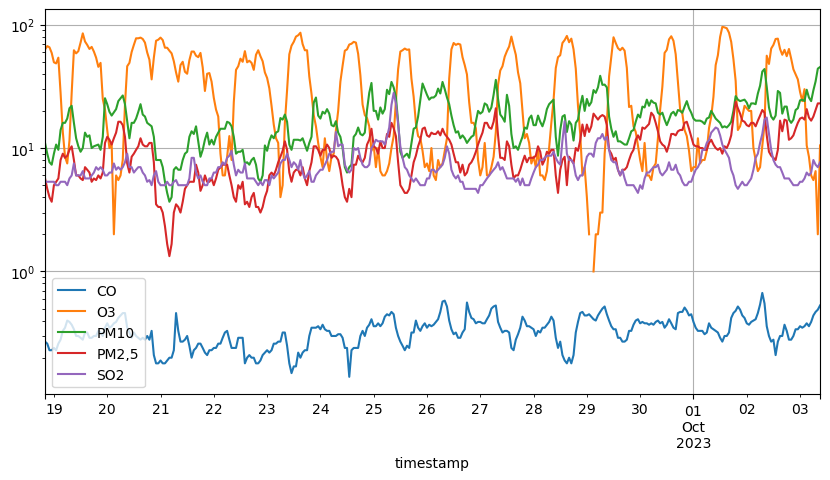

In [13]:
bilbao_df['CO O3 PM10 PM2,5 SO2'.split()].plot(figsize=(10,5), grid=True, logy=True);

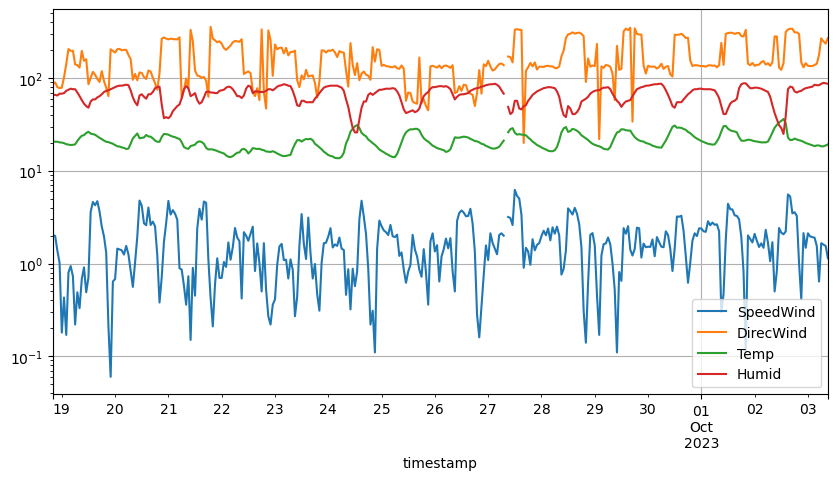

In [14]:
bilbao_df['SpeedWind DirecWind Temp Humid'.split()].plot(figsize=(10,5), grid=True, logy=True);

## Show sensors and cameras location

### Traffic cameras (all)

In [15]:
traffic_cameras_df= pd.read_json(os.path.join(data_path,'trafico_localizacion_camaras.json'))
traffic_cameras_df['lat']=traffic_cameras_df.apply(lambda r: r['location']['latitude'], axis=1)
traffic_cameras_df['lon']=traffic_cameras_df.apply(lambda r: r['location']['longitude'], axis=1)
traffic_cameras_df = traffic_cameras_df.drop(columns='url city title location'.split())
traffic_cameras_df.head()

,id,lat,lon
0,1305,40.407658,-3.693109
1,1304,40.409189,-3.692159
2,1302,40.418975,-3.693114
3,1317,40.418890,-3.696665
4,1318,40.416659,-3.700281


In [16]:
traffic_cameras_gdf = gpd.GeoDataFrame(
    traffic_cameras_df, geometry=gpd.points_from_xy(traffic_cameras_df.lon, traffic_cameras_df.lat), crs="EPSG:4326"
)
traffic_cameras_gdf.head()

,id,lat,lon,geometry
0,1305,40.407658,-3.693109,POINT (-3.69311 40.40766)
1,1304,40.409189,-3.692159,POINT (-3.69216 40.40919)
2,1302,40.418975,-3.693114,POINT (-3.69311 40.41898)
3,1317,40.418890,-3.696665,POINT (-3.69667 40.41889)
4,1318,40.416659,-3.700281,POINT (-3.70028 40.41666)


In [17]:
traffic_cameras_gdf['type']='camera'

### Madrid airpollution stations

In [18]:
madrid_ap_sensors_df= pd.read_csv(os.path.join(data_path,'airpolution_localizacion_madrid.csv'),sep=';')
madrid_ap_sensors_df.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,...,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,...,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,...,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,...,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,...,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


In [19]:
madrid_ap_sensors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODIGO               24 non-null     int64  
 1   CODIGO_CORTO         24 non-null     int64  
 2   ESTACION             24 non-null     object 
 3   DIRECCION            24 non-null     object 
 4   LONGITUD_ETRS89      24 non-null     object 
 5   LATITUD_ETRS89       24 non-null     object 
 6   ALTITUD              24 non-null     int64  
 7   COD_TIPO             24 non-null     object 
 8   NOM_TIPO             24 non-null     object 
 9   NO2                  24 non-null     object 
 10  SO2                  4 non-null      object 
 11  CO                   4 non-null      object 
 12  PM10                 13 non-null     object 
 13  PM2_5                8 non-null      object 
 14  O3                   13 non-null     object 
 15  BTX                  6 non-null      objec

In [20]:
madrid_ap_sensors_df= madrid_ap_sensors_df.drop(columns=madrid_ap_sensors_df.columns.difference(['CODIGO','LATITUD','LONGITUD']))
madrid_ap_sensors_df.head()

,CODIGO,LONGITUD,LATITUD
0,28079004,-3.712257,40.423882
1,28079008,-3.682316,40.421553
2,28079011,-3.677349,40.451473
3,28079016,-3.639242,40.440046
4,28079017,-3.713317,40.347147


In [21]:
madrid_ap_sensors_gdf = gpd.GeoDataFrame(
    madrid_ap_sensors_df, geometry=gpd.points_from_xy(madrid_ap_sensors_df.LONGITUD, madrid_ap_sensors_df.LATITUD), crs="EPSG:4326"
)
madrid_ap_sensors_gdf['type']='airpollution'

madrid_ap_sensors_gdf= madrid_ap_sensors_gdf.rename(columns={'LONGITUD':'lon', 'LATITUD':'lat', 'CODIGO':'id'})
madrid_ap_sensors_gdf.head()

,id,lon,lat,geometry,type
0,28079004,-3.712257,40.423882,POINT (-3.71226 40.42388),airpollution
1,28079008,-3.682316,40.421553,POINT (-3.68232 40.42155),airpollution
2,28079011,-3.677349,40.451473,POINT (-3.67735 40.45147),airpollution
3,28079016,-3.639242,40.440046,POINT (-3.63924 40.44005),airpollution
4,28079017,-3.713317,40.347147,POINT (-3.71332 40.34715),airpollution


### Bilbao airpollution stations

In [22]:
bilbao_ap_sensor_df= pd.read_csv(os.path.join(data_path, 'airpolution_localizacion_bilbao.csv'))
bilbao_ap_sensor_df.head()

,id,lat,lon,type
0,MAZARREDO,43.267506,-2.935188,airpollution
1,Mª DIAZ HARO,43.258803,-2.945657,airpollution
2,EUROPA,43.254911,-2.902376,airpollution


In [23]:
bilbao_ap_sensors_gdf = gpd.GeoDataFrame(
    bilbao_ap_sensor_df, geometry=gpd.points_from_xy(bilbao_ap_sensor_df.lon, bilbao_ap_sensor_df.lat), crs="EPSG:4326"
)
bilbao_ap_sensors_gdf.head()

,id,lat,lon,type,geometry
0,MAZARREDO,43.267506,-2.935188,airpollution,POINT (-2.93519 43.26751)
1,Mª DIAZ HARO,43.258803,-2.945657,airpollution,POINT (-2.94566 43.25880)
2,EUROPA,43.254911,-2.902376,airpollution,POINT (-2.90238 43.25491)


Merge all the data in a single geodataframe

In [24]:
sensors_gdf = pd.concat([traffic_cameras_gdf,madrid_ap_sensors_gdf,bilbao_ap_sensors_gdf],axis=0)

In [25]:
sensors_gdf['id']= sensors_gdf['id'].astype(str)

In [26]:
sensors_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 88 entries, 0 to 2
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        88 non-null     object  
 1   lat       88 non-null     float64 
 2   lon       88 non-null     float64 
 3   geometry  88 non-null     geometry
 4   type      88 non-null     object  
dtypes: float64(2), geometry(1), object(2)
memory usage: 4.1+ KB


In [27]:
sensors_gdf.head()

,id,lat,lon,geometry,type
0,1305,40.407658,-3.693109,POINT (-3.69311 40.40766),camera
1,1304,40.409189,-3.692159,POINT (-3.69216 40.40919),camera
2,1302,40.418975,-3.693114,POINT (-3.69311 40.41898),camera
3,1317,40.418890,-3.696665,POINT (-3.69667 40.41889),camera
4,1318,40.416659,-3.700281,POINT (-3.70028 40.41666),camera


In [28]:
sensors_gdf.tail()

,id,lat,lon,geometry,type
22,28079059,40.460726,-3.616341,POINT (-3.61634 40.46073),airpollution
23,28079060,40.500548,-3.689731,POINT (-3.68973 40.50055),airpollution
0,MAZARREDO,43.267506,-2.935188,POINT (-2.93519 43.26751),airpollution
1,Mª DIAZ HARO,43.258803,-2.945657,POINT (-2.94566 43.25880),airpollution
2,EUROPA,43.254911,-2.902376,POINT (-2.90238 43.25491),airpollution


In [29]:
sensors_gdf.explore('type', color='green blue'.split(), marker_kwds={"radius":12})

In [53]:
target_ap_madrid='28079008 28079049 28079035 28079004 28079047'.split()
target_ap_bilbao=['MAZARREDO', 'Mª DIAZ HARO']
target_trf_madrid='1318 1316 1317 1324 4322 4308 1303 1323 1304 1331 1305 1332'.split()
target_trf_bilbao='37 42 8 41 4 30 68 69 52 44 5  32 33 34 35 65 72'.split()

In [31]:
sensors_gdf.to_file(os.path.join(data_path,'01_sensors_location.geojson'), driver='GeoJSON')  

### Beautiful plots for the paper

In [54]:
madrid_to_show_gdf = sensors_gdf[(sensors_gdf['id'].isin(target_ap_madrid)) | (sensors_gdf['id'].isin(target_trf_madrid))]
madrid_to_show_gdf

,id,lat,lon,geometry,type
0,1305,40.407658,-3.693109,POINT (-3.69311 40.40766),camera
1,1304,40.409189,-3.692159,POINT (-3.69216 40.40919),camera
3,1317,40.418890,-3.696665,POINT (-3.69667 40.41889),camera
4,1318,40.416659,-3.700281,POINT (-3.70028 40.41666),camera
5,4308,40.420887,-3.684416,POINT (-3.68442 40.42089),camera
6,1303,40.415188,-3.693836,POINT (-3.69384 40.41519),camera
7,1316,40.417955,-3.699356,POINT (-3.69936 40.41795),camera
8,1323,40.412905,-3.693404,POINT (-3.69340 40.41290),camera
9,1331,40.408825,-3.691995,POINT (-3.69199 40.40882),camera
10,1332,40.407506,-3.693410,POINT (-3.69341 40.40751),camera


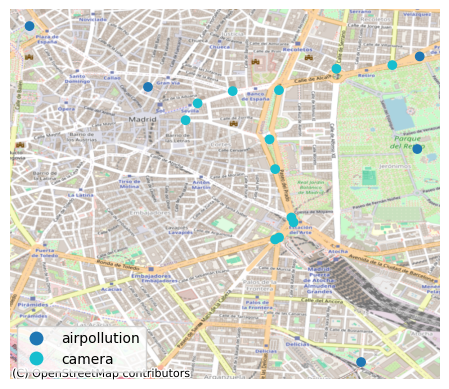

In [55]:
ax=madrid_to_show_gdf.plot('type',categorical=True, legend=True,  cmap='tab10')
ax.axis('off')
cx.add_basemap(ax, crs=madrid_to_show_gdf.crs, source=cx.providers.OpenStreetMap.Mapnik)
plt.savefig(os.path.join('figs', '01_madrid_configuration.png'), bbox_inches='tight')

In [56]:
bilbao_to_show_gdf = sensors_gdf[(sensors_gdf['id'].isin(target_ap_bilbao)) | (sensors_gdf['id'].isin(target_trf_bilbao))]
bilbao_to_show_gdf

,id,lat,lon,geometry,type
27,37,43.268152,-2.931410,POINT (-2.93141 43.26815),camera
29,42,43.263734,-2.934684,POINT (-2.93468 43.26373),camera
30,8,43.262890,-2.934364,POINT (-2.93436 43.26289),camera
31,41,43.261936,-2.935397,POINT (-2.93540 43.26194),camera
38,44,43.266886,-2.936964,POINT (-2.93696 43.26689),camera
39,5,43.266550,-2.938461,POINT (-2.93846 43.26655),camera
41,32,43.265411,-2.945273,POINT (-2.94527 43.26541),camera
42,35,43.265366,-2.945342,POINT (-2.94534 43.26537),camera
43,34,43.265133,-2.945269,POINT (-2.94527 43.26513),camera
44,33,43.265225,-2.945035,POINT (-2.94503 43.26523),camera


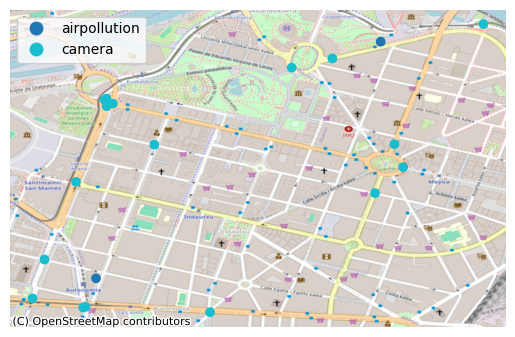

In [57]:
ax=bilbao_to_show_gdf.plot('type',categorical=True, legend=True,  cmap='tab10')
ax.axis('off')
cx.add_basemap(ax, crs=madrid_to_show_gdf.crs, source=cx.providers.OpenStreetMap.Mapnik)
plt.savefig(os.path.join('figs', '01_bilbao_configuration.png'), bbox_inches='tight')

In [58]:
print("That's all folks!")

That's all folks!
